# Inhalt

1. [Daten](#daten)
2. [Machine Learning](#ml)
    1. [K-Nearest Neighbor](#knn)
    2. [Regression](#regression)
    3. [Neuronales Netzwerk](#nn)
3. [Anwendungsfälle mit realen Sensordaten](#use-case)
    1. [Zeitreihenvorhersage mit LSTM (Time Series Prediction with LSTM)](#nn-use)


# Daten  <a name="daten"></a>
Wir werden einen Beispieldatensatz verwenden, der während des Aufbaus dieses Kurses erstellt wurde. Der Datensatz enthält einige Personen und ihre Merkmale wie Alter, Größe, Abschluss und Familienstand.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
# import plotly.express as px
# from jupyter_dash import JupyterDash
# from dash import dcc
# from dash import html
# from dash.dependencies import Input, Output
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

ordinal_encoder = OrdinalEncoder()

daten = [
        [1, 15, 174, 70, 'B. Sc.', 'B. Sc.', False],
        [2, 30, 181, 84, 'B. Sc.', 'B. Sc.', True],
        [3, 14, 163, 65, 'B. Sc.', 'B. Sc.', False],
        [4, 60, 187, 75, 'B. Sc.', 'B. Sc.', True],
        [5, 52, 156, 59, 'B. Sc.', 'B. Sc.', True],
#         [6, 41, 178, 81, 'B. Sc.', 'B. Sc.', True],
       ]

daten = pd.DataFrame(daten, columns=['Person', 'Alter', 'Größe (cm)', 'Gewicht (kg)', 'Erster Grad', 'Zweiter Grad', 'Ist verheiratet?'])
daten.head(10)

,Person,Alter,Größe (cm),Gewicht (kg),Erster Grad,Zweiter Grad,Ist verheiratet?
0,1,15,174,70,B. Sc.,B. Sc.,False
1,2,30,181,84,B. Sc.,B. Sc.,True
2,3,14,163,65,B. Sc.,B. Sc.,False
3,4,60,187,75,B. Sc.,B. Sc.,True
4,5,52,156,59,B. Sc.,B. Sc.,True


# Machine Learning <a name="ml"></a>

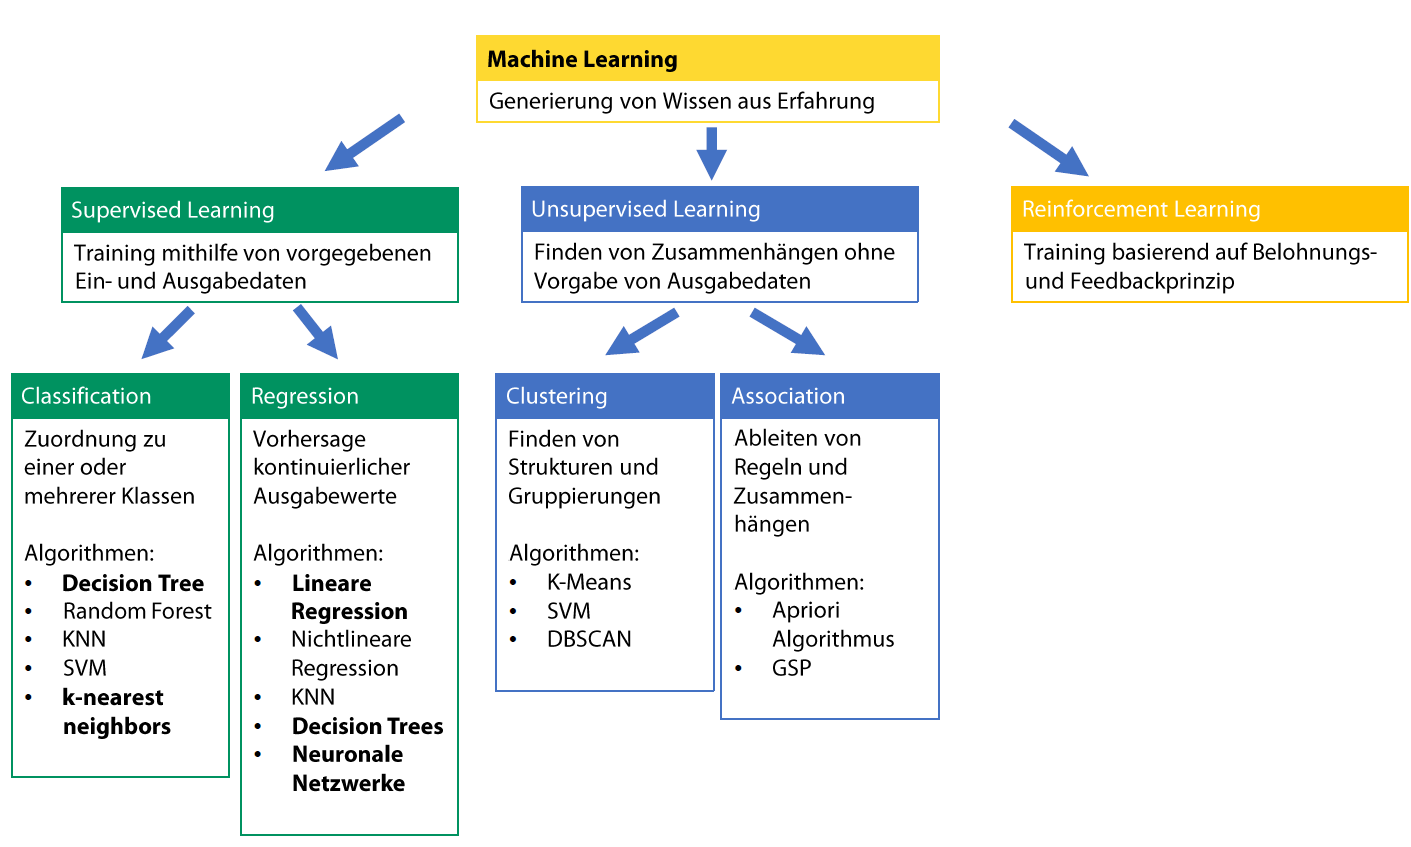

## K-Nearest Neighbor  <a name="knn"></a>

Der K-Nearest-Neighbor-Algorithmus (KNN) ist ein Algorithmus, der zu den überwachten Lernmethoden gehört, bzw. genauer gesagt zur Familie der Klassifizierungsverfahren. Der Algorithmus nutzt die Labels einer festgelegten Anzahl K nächster Nachbarn, um das Label eines neuen Datenpunktes zu bestimmen.

Der Ansatz dieses Algorithmus funktioniert in zwei Schritten:

1. Zunächst werden die Daten in einen festgelegten Bereich [0, 1] skaliert. Der Abstand (Euklidische Distanz) zwischen den Daten muss für diesen Fall berechnet werden. 
2. Wird nun ein neuer Datenpunkt hinzugefügt muss dieser zunächst skaliert werden. Anschließend wenden wir den euklidischen Abstand auf alle Zeilen des Datensatzes mit der neuen Zeile an. Der nächste Schritt besteht darin, K nächste Nachbarn zu nehmen, d.h. die Zeilen mit dem geringstenAbstand zur neuen Zeile zu ermitteln und dann deren y-Wert zu verwenden, um den y-Wert der neu hinzugekommenen Zeile festzulegen.

$$d(p, q) = \sqrt{\sum_i(q_i - p_i)^2}$$

<!--- ![image-2.png](attachment:image-2.png) -->

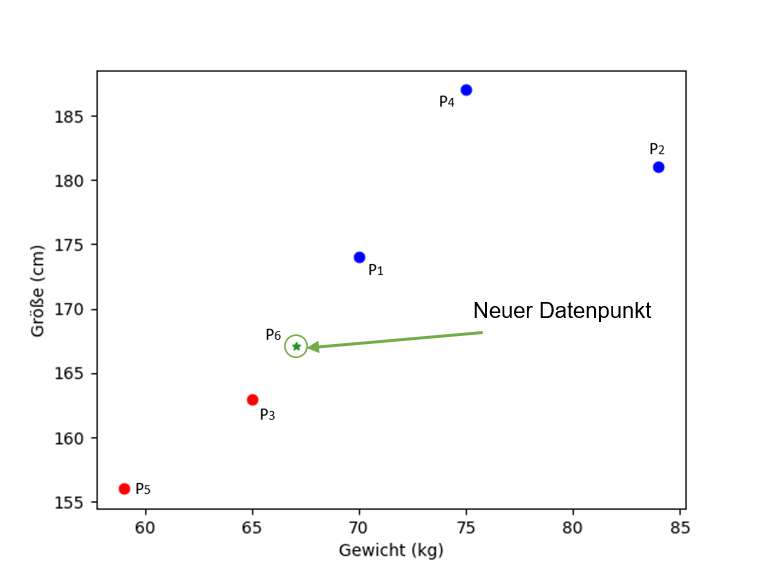

In [14]:
daten.head()

,Person,Alter,Größe (cm),Gewicht (kg),Erster Grad,Zweiter Grad,Ist verheiratet?,Aufzählung,Vorangehendes Alter,Nachfolges Alter,RANK,SUMME,DURCHSCHNITT,ANZAHL,MIN,MAX
0,1,15,174,70,B. Sc.,B. Sc.,False,2,NaN,30.0,2.0,29,14.500000,2,14,15
1,2,30,181,84,B. Sc.,B. Sc.,True,1,15.0,14.0,3.0,142,47.333333,3,30,60
2,3,14,163,65,B. Sc.,B. Sc.,False,1,30.0,60.0,1.0,29,14.500000,2,14,15
3,4,60,187,75,B. Sc.,B. Sc.,True,3,14.0,52.0,2.0,142,47.333333,3,30,60
4,5,52,156,59,B. Sc.,B. Sc.,True,2,60.0,NaN,1.0,142,47.333333,3,30,60


In [16]:
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
skalierte_daten = minmax_scaler.fit_transform(daten[['Alter', 'Größe (cm)', 'Gewicht (kg)']].values)

X = skalierte_daten
y = np.ravel(daten[['Ist verheiratet?']])
knn = KNeighborsClassifier(n_neighbors=2)
knn = knn.fit(X, y)

# fügen Sie die 6. Person hinzu
neu_person = pd.DataFrame({'Person': [6], 'Alter': [41], 'Größe (cm)': [167], 'Gewicht (kg)': [67], 'Erster Grad': ['B. Sc.'], 'Zweiter Grad': ['B. Sc.'], 'Ist verheiratet?': [None]})
scalierte_neu_person = minmax_scaler.fit_transform(neu_person[['Alter', 'Größe (cm)', 'Gewicht (kg)']].values)
skalierte_daten = skalierte_daten + scalierte_neu_person

vorhersage_ergebnis = knn.predict(skalierte_daten[-1].reshape(1, -1))
print("Der Merkmalswert von 'Ist verheiratet?' für die neue Person ist {}".format(vorhersage_ergebnis))

Der Merkmalswert von 'Ist verheiratet?' für die neue Person ist [False]


## Regression <a name="regression"></a>
Die Regressionsanalyse ist eine statistische Methode, die es ermöglicht, Beziehungen zwischen verschiedenen Faktoren aufzudecken. Die Regressionsanalyse ermöglicht drei Dinge:

- *Beschreibung*: Die Beziehungen zwischen den abhängigen Variablen und den unabhängigen Variablen können mit Hilfe der Regressionsanalyse statistisch beschrieben werden.
- *Schätzung*: Die Werte der abhängigen Variablen können anhand der beobachteten Werte der unabhängigen Variablen geschätzt werden.
- *Vorhersage*: Risikofaktoren, die das Ergebnis beeinflussen, können identifiziert und individuelle Prognosen getroffen werden.

Normaler Fehler = -0.000000000000
RMSE = 4.26
MAE = 3.22


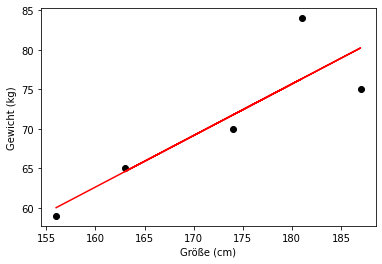

In [19]:
model = LinearRegression()
model.fit(daten[['Größe (cm)']].values, daten[['Gewicht (kg)']].values)

y = daten[['Gewicht (kg)']].values
y_hat = model.predict(daten[['Größe (cm)']].values)

epsilon = y - y_hat
RMSE = np.sqrt(np.sum(np.power(epsilon, 2)) / len(y))
MAE = np.sum(np.absolute(epsilon)) / len(y)

print('Normaler Fehler = %.12f' % np.sum(epsilon))
print('RMSE = %.2f' % RMSE)
print('MAE = %.2f' % MAE)

plt.scatter(daten[['Größe (cm)']].values, daten[['Gewicht (kg)']].values, c='black')
plt.plot(daten[['Größe (cm)']].values, y_hat, c='r')
plt.xlabel('Größe (cm)')
plt.ylabel('Gewicht (kg)')
plt.show()

## Neuronales Netzwerk <a name="nn"></a>
Neural networks (NN) belong to the algorithms of machine learning, whereby the concept of these networks, as the name implies, is derived from the neurons of the human brain. Basically, the idea is to map an input to a desired output, just like the output, just as in other machine learning algorithms. But NN cover a broader range of solutions due to their type.

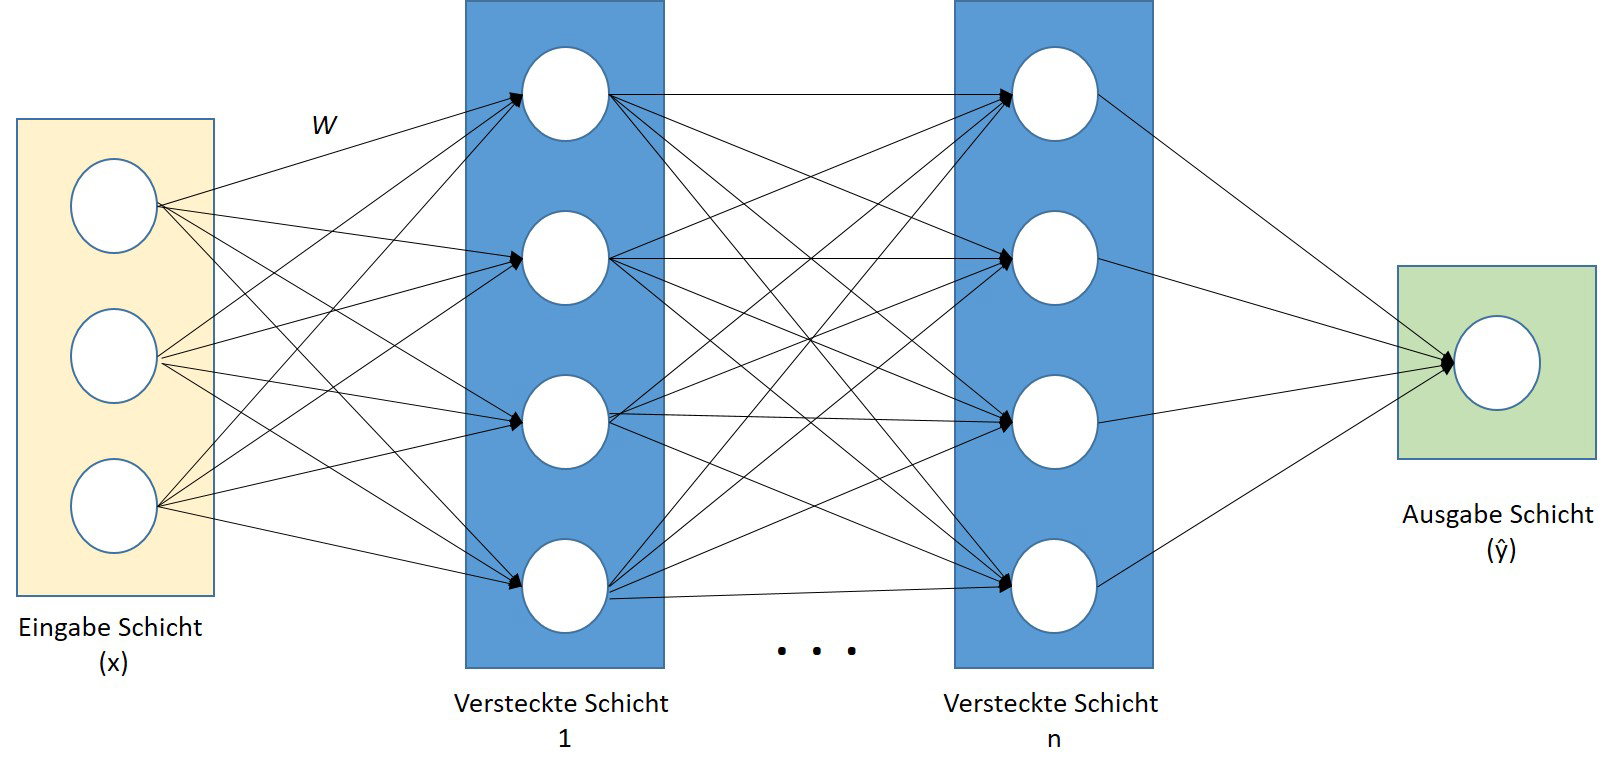

Neuronale Netze bestehen aus den folgenden Komponenten:

- Eine Eingabeschicht x (links in Abbildung)
- Eine beliebige Anzahl von versteckten Schichten (mittig in der Abbildung)
- Eine Ausgabeschicht $\hat{y}$ (rechts in Abbildung)
- Ein Satz von Gewichtungen und Bias (Urteilsverzerrungen) zwischen jeder Schicht W und b (siehe Abbildung)
- Eine Aktivierungsfunktion für jede versteckte Schicht, wobei eine Aktivierungsfunktion eine Funktion ist, die einem künstlichen neuronalen Netz hinzugefügt wird, um dem Netz zu helfen, komplexe Muster in den Daten zu lernen. In Analogie zu einem neuronenbasierten Modell, wie es in unserem Gehirn vorkommt, entscheidet die Aktivierungsfunktion am Ende, was an das nächste Neuron weitergegeben wird.

In [20]:
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

def sigmoid_derivativ(x):
    return x * (1.0 - x)

def loss(y, y_hat):
    return y - y_hat

class NeuronalesNetzwerk:
    def __init__(self, x, y):
        self.eingabe = x
        self.gewichte1 = np.random.rand(self.eingabe.shape[1], 1)
        self.y = y 
        self.y_hat = np.zeros(self.y.shape)
        self.lern_rate = 0.001
    
    def feedforward(self):
        self.y_hat = sigmoid(np.dot(self.eingabe, self.gewichte1))
    
    def backpropagation(self):
        d_gewichte1 = np.dot(self.y_hat.T, (self.lern_rate * loss(self.y, self.y_hat) * sigmoid_derivativ(self.y_hat)))
        
        self.gewichte1 = self.gewichte1 + d_gewichte1

if __name__ == '__main__':
    minmax_scaler = MinMaxScaler(feature_range=(0, 1))
    X = minmax_scaler.fit_transform(daten[['Größe (cm)']].values)  
    y = minmax_scaler.fit_transform(daten[['Gewicht (kg)']].values)
    
    nn = NeuronalesNetzwerk(X, y)
    
    for i in range(30):
        nn.feedforward()
        nn.backpropagation()
    
#     print(minmax_scaler.inverse_transform(nn.y_hat))
    print(minmax_scaler.inverse_transform(nn.y_hat))    

[[72.04684829]
 [72.25906153]
 [71.7127785 ]
 [72.44061436]
 [71.5       ]]


In [21]:
daten.head(10)

,Person,Alter,Größe (cm),Gewicht (kg),Erster Grad,Zweiter Grad,Ist verheiratet?,Aufzählung,Vorangehendes Alter,Nachfolges Alter,RANK,SUMME,DURCHSCHNITT,ANZAHL,MIN,MAX
0,1,15,174,70,B. Sc.,B. Sc.,False,2,NaN,30.0,2.0,29,14.500000,2,14,15
1,2,30,181,84,B. Sc.,B. Sc.,True,1,15.0,14.0,3.0,142,47.333333,3,30,60
2,3,14,163,65,B. Sc.,B. Sc.,False,1,30.0,60.0,1.0,29,14.500000,2,14,15
3,4,60,187,75,B. Sc.,B. Sc.,True,3,14.0,52.0,2.0,142,47.333333,3,30,60
4,5,52,156,59,B. Sc.,B. Sc.,True,2,60.0,NaN,1.0,142,47.333333,3,30,60


# Anwendungsfälle mit realen Sensordaten <a name="use-case"></a>

## Zeitreihenvorhersage mit LSTM (Time Series Prediction with LSTM) <a name="nn-use"></a>

In [ ]:
import numpy as np
import torch

np.random.seed(2)

T = 20
L = 1000
N = 100

x = np.empty((N, L), 'int64')
x[:] = np.array(range(L)) + np.random.randint(-4 * T, 4 * T, N).reshape(N, 1)
daten = np.sin(x / 1.0 / T).astype('float64')
torch.save(daten, open('traindata.pt', 'wb'))

In [26]:
from __future__ import print_function
import argparse
import torch.nn as nn
import torch.optim as optim
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pandas as pd
import os

In [27]:
class Sequenz(nn.Module):
    def __init__(self):
        super(Sequenz, self).__init__()
        self.lstm1 = nn.LSTMCell(1, 51)
        self.lstm2 = nn.LSTMCell(51, 51)
        self.linear = nn.Linear(51, 1)

    def forward(self, input, future = 0):
        ausgange= []
        h_t = torch.zeros(input.size(0), 51, dtype=torch.double)
        c_t = torch.zeros(input.size(0), 51, dtype=torch.double)
        h_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)
        c_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)

        for input_t in input.split(1, dim=1):
            h_t, c_t = self.lstm1(input_t, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            ausgang = self.linear(h_t2)
            ausgange+= [ausgang]
        for i in range(future):
            h_t, c_t = self.lstm1(ausgang, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            ausgang = self.linear(h_t2)
            ausgange += [ausgang]
        ausgange= torch.cat(ausgange,dim=1)
        return ausgange

In [28]:
schritte = 15
anzahl_der_welle = 3
farben = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'w']

np.random.seed(0)
torch.manual_seed(0)

if not os.path.exists('results'):
    os.makedirs('results')

daten = torch.load('traindata.pt')
eingabe = torch.from_numpy(daten[3:, :-1])
ziel = torch.from_numpy(daten[3:, 1:])
test_eingabe = torch.from_numpy(daten[:3, :-1])
test_ziel = torch.from_numpy(daten[:3, 1:])

seq = Sequenz()
seq.double()
criterion = nn.MSELoss()

optimizer = optim.LBFGS(seq.parameters(), lr=0.8)

(4096, 2)
(1, 4096)
2868 1228
torch.Size([2, 1434]) torch.Size([2, 1434]) torch.Size([2, 614]) torch.Size([2, 614])


In [29]:
# training
for i in range(schritte):
    print('Shritte: ', i)
    def closure():
        optimizer.zero_grad()
        out = seq(eingabe)
        loss = criterion(out, ziel)
        print('loss:', loss.item())
        loss.backward()
        return loss
    optimizer.step(closure)
    with torch.no_grad():
        futur = 1000
        pred = seq(test_eingabe, future=futur)
        loss = criterion(pred[:, :-futur], test_ziel)
        print('test loss:', loss.item())
        y = pred.detach().numpy()
    plt.figure(figsize=(30,10))
    plt.title('Vorhersage zukünftiger Werte für Energiedaten \n(Striche sind vorhergesagte Werte)', fontsize=30)
    plt.xlabel('x', fontsize=20)
    plt.ylabel('y', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    def draw(yi, farbe, i):
        plt.plot(np.arange(daten.shape[0]), daten[:,i], farbe, linewidth=2.0)
        plt.plot(np.arange(daten.shape[0], daten.shape[0] + futur), yi[test_eingabe.size(1):], farbe + ':', linewidth = 2.0)

        
    for index in range(anzahl_der_sensordaten):
        draw(y[index], farben[index], index)
    plt.savefig('results/predict%d.pdf'%i)
    plt.close()

Shritte:  0
loss: 16.171059376573197
loss: 16.13228126180616
loss: 11.51396411473209
loss: 9.279066784708428
loss: 6.753532121147351
loss: 6.532199114566852
loss: 5.894565623327413
loss: 5.049420451675636
loss: 4.789859598879684
loss: 2.428525075450441
loss: 1.8261811891666666
loss: 1.6776143692535421
loss: 1.5713543782560788
loss: 1.3825146738554286
loss: 1.1054774444137225
loss: 0.6653865243771768
loss: 0.4499472287612234
loss: 0.3176456680538018
loss: 0.25790638863430543
loss: 0.21338495291595164
test loss: 0.11044799039192557
Shritte:  1
loss: 0.17003595522971052
loss: 0.157342206805271
loss: 0.14347288002829817
loss: 0.12797118088163312
loss: 0.12087295282864653
loss: 0.11424792105806546
loss: 0.11127740645170625
loss: 0.10641432004102734
loss: 0.10138684096948643
loss: 0.09727663499816948
loss: 0.09377849897835112
loss: 0.08960566561521584
loss: 0.08490086037165691
loss: 0.07828437984879234
loss: 0.07012252546549513
loss: 0.06536132077573437
loss: 0.06272882394630634
loss: 0.0592